In [153]:
# Import packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# 1 Import DElncRNA FoldChange Information

In [154]:
# IMPORT raw data from deg (Rstudio)
# GENE LEVEL 
t_deg_na = pd.read_csv('../9_1_dea_lncrna/comp_anoxia_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='Normoxia to Anoxia').rename(columns={'Unnamed: 0':'transcript_id'})
t_deg_nr = pd.read_csv('../9_1_dea_lncrna/comp_reoxygenation_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='Normoxia to Reoxygenation').rename(columns={'Unnamed: 0':'transcript_id'})
t_deg_ar = pd.read_csv('../9_1_dea_lncrna/comp_anoxia_reoxygenation.csv', header=0, sep=',').assign(regulation='up', condition='Anoxia to Reoxygenation').rename(columns={'Unnamed: 0':'transcript_id'})
t_deg = pd.concat([t_deg_na, t_deg_nr, t_deg_ar])
# TRANSCRIPT LEVEL 
g_deg_na = pd.read_csv('../10_lncRNA_classification/10_3_deg_lncRNA_interactionpartners/comp_anoxia_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='Normoxia to Anoxia').rename(columns={'Unnamed: 0': 'gene_id'})
g_deg_nr = pd.read_csv('../10_lncRNA_classification/10_3_deg_lncRNA_interactionpartners/comp_reoxygenation_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='Normoxia to Reoxygenation').rename(columns={'Unnamed: 0':'gene_id'})
g_deg_ar = pd.read_csv('../10_lncRNA_classification/10_3_deg_lncRNA_interactionpartners/comp_anoxia_reoxygenation.csv', header=0, sep=',').assign(regulation='up', condition='Anoxia to Reoxygenation').rename(columns={'Unnamed: 0':'gene_id'})
g_deg = pd.concat([g_deg_na, g_deg_nr, g_deg_ar])

# identified lncRNAs
# IMPORT DATA DElncRNA with interaction partner 
lncrna = pd.read_csv('../10_lncRNA_classification/10_3_deg_lncRNA_interactionpartners/delncrna_interaction_partners.txt', sep='\t', header=0)


In [155]:
lncrna = lncrna.loc[lncrna['partnerRNA_gene'].isin(g_deg['gene_id'])]
lncrna = lncrna.loc[lncrna['lncRNA_transcript'].isin(t_deg['transcript_id'])]

In [156]:
t_deg = t_deg.set_index('transcript_id')[['log2FoldChange', 'condition']].loc[lncrna['lncRNA_transcript']]

In [157]:
g_deg = g_deg.set_index('gene_id')[['log2FoldChange', 'condition']].loc[lncrna['partnerRNA_gene']]

In [158]:
data = pd.concat([g_deg.reset_index(), t_deg.reset_index()], axis=1) 
data.columns=['gene_id', 'g_log2FoldChange', 'condition', 'transcript_id', 't_log2FoldChange', 't_condition']
data.drop(columns=['t_condition'], inplace=True)

In [159]:
grouped = data.groupby('condition')

/tmp/ipykernel_1603/2611489907.py:5: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x = group['g_log2FoldChange'], y = group['t_log2FoldChange'], ax = axes[i], height=(5/2.54), color='#8DA0CB', linewidths=0.1, edgecolors='black')
/tmp/ipykernel_1603/2611489907.py:13: UserWarning: The figure layout has changed to tight
  plt.gcf().tight_layout()
/tmp/ipykernel_1603/2611489907.py:5: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x = group['g_log2FoldChange'], y = group['t_log2FoldChange'], ax = axes[i], height=(5/2.54), color='#8DA0CB', linewidths=0.1, edgecolors='black')
/tmp/ipykernel_1603/2611489907.py:13: UserWarning: The figure layout has changed to tight
  plt.gcf().tight_layout()
/tmp/ipykernel_1603/2611489907.py:5: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x = group['g_log2FoldChange'], y = group['t_log2FoldChange'], ax = axes[i], height=(5/2.54), color='#8DA0CB', linewid

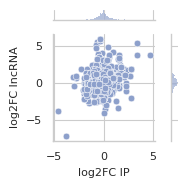

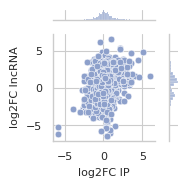

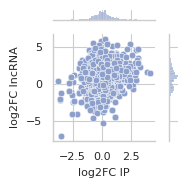

In [160]:
sns.set_theme(style = 'whitegrid', palette='colorblind', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})


for i,(key, group) in enumerate(grouped):
    sns.jointplot(x = group['g_log2FoldChange'], y = group['t_log2FoldChange'], ax = axes[i], height=(5/2.54), color='#8DA0CB', linewidths=0.1, edgecolors='black')
    plt.ylabel('log2FC lncRNA')
    plt.xlabel('log2FC IP')
    #plt.title(key, loc='center', y=1.2)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


    plt.gcf().tight_layout()
    plt.savefig(f'{key}_scatterplot_lncRNA_interactionpartner.svg')